### Import data

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
df = pd.read_csv('cleaned_DS_salary.csv', index_col= 0)

df.columns

Index(['Job Title', 'Salary Estimate', 'Job Description', 'Rating',
       'Company Name', 'Location', 'Headquarters', 'Size', 'Founded',
       'Type of ownership', 'Industry', 'Sector', 'Revenue', 'Competitors',
       'hourly salary', 'employer_provided', 'min_salary', 'max_salary',
       'avg_salary', 'Company_txt', 'job_state', 'is_HQ_state_same',
       'age_of_company', 'job_simp', 'seniority', 'desc_length', 'num_comp'],
      dtype='object')

In [3]:
df['Rating'].fillna(3.688372,inplace = True ) ## setting nan to mean rating value
df['age_of_company'].fillna(-1, inplace = True )
df['Revenue'].fillna('Unknown / Non-Applicable', inplace=True)
df['Type of ownership'].fillna('Company - Private', inplace = True)
df['Industry'].fillna('Biotech & Pharmaceuticals', inplace = True)
df['Sector'].fillna('Information Technology', inplace = True)

In [4]:
pd.options.display.max_rows
pd.set_option('display.max_rows', None)

## To do

##### Choose revelent column

In [5]:
df_model = df[['avg_salary','Rating', 'Type of ownership','Industry','Sector', 'Revenue','num_comp','hourly salary','employer_provided', 'job_state', 'is_HQ_state_same',
       'age_of_company', 'job_simp', 'seniority', 'desc_length'  ]]

df_model.head()

,avg_salary,Rating,Type of ownership,Industry,Sector,Revenue,num_comp,hourly salary,employer_provided,job_state,is_HQ_state_same,age_of_company,job_simp,seniority,desc_length
0,72.0,3.8,Company - Private,Aerospace & Defense,Aerospace & Defense,$50 to $100 million (USD),0,0,0,NM,0,47.0,data scientist,na,2536
1,87.5,3.4,Other Organization,Health Care Services & Hospitals,Health Care,$2 to $5 billion (USD),0,0,0,MD,0,36.0,data scientist,na,4783
2,85.0,4.8,Company - Private,Security Services,Business Services,$100 to $500 million (USD),0,0,0,FL,1,10.0,data scientist,na,3461
3,76.5,3.8,Government,Energy,"Oil, Gas, Energy & Utilities",$500 million to $1 billion (USD),3,0,0,WA,1,55.0,data scientist,na,3883
4,114.5,2.9,Company - Private,Advertising & Marketing,Business Services,Unknown / Non-Applicable,3,0,0,NY,1,22.0,data scientist,na,2728


In [6]:
df_model.shape

(742, 15)

#### Get dummy datd

In [7]:
df_dum  = pd.get_dummies(df_model)
df_dum.head()

,avg_salary,Rating,num_comp,hourly salary,employer_provided,is_HQ_state_same,age_of_company,desc_length,Type of ownership_College / University,Type of ownership_Company - Private,...,job_simp_analyst,job_simp_data engineer,job_simp_data scientist,job_simp_director,job_simp_manager,job_simp_mle,job_simp_na,seniority_jr,seniority_na,seniority_senior
0,72.0,3.8,0,0,0,0,47.0,2536,0,1,...,0,0,1,0,0,0,0,0,1,0
1,87.5,3.4,0,0,0,0,36.0,4783,0,0,...,0,0,1,0,0,0,0,0,1,0
2,85.0,4.8,0,0,0,1,10.0,3461,0,1,...,0,0,1,0,0,0,0,0,1,0
3,76.5,3.8,3,0,0,1,55.0,3883,0,0,...,0,0,1,0,0,0,0,0,1,0
4,114.5,2.9,3,0,0,1,22.0,2728,0,1,...,0,0,1,0,0,0,0,0,1,0


#### Train test split

In [8]:
from sklearn.model_selection import train_test_split

X = df_dum.drop('avg_salary', axis =1)
y = df_dum.avg_salary.values

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

#### Multi linear regression

In [9]:
import statsmodels.api as sm

X_sm = X = sm.add_constant(X)
model = sm.OLS(y,X_sm)
model.fit().summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      y   R-squared:                       0.681
Model:                            OLS   Adj. R-squared:                  0.613
Method:                 Least Squares   F-statistic:                     10.04
Date:                Tue, 31 Aug 2021   Prob (F-statistic):           2.80e-90
Time:                        15:33:46   Log-Likelihood:                -3344.0
No. Observations:                 742   AIC:                             6950.
Df Residuals:                     611   BIC:                             7554.
Df Model:                         130                                         
Covariance Type:            nonrobust                                         
=====================================================================================================================
                                                        coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------------------------------------
const                                                39.0217      6.933      5.628      0.000      25.406      52.637
Rating                                                6.1261      2.273      2.695      0.007       1.662      10.591
num_comp                                              2.7516      0.865      3.182      0.002       1.053       4.450
hourly salary                                       -44.6089      9.250     -4.822      0.000     -62.775     -26.442
employer_provided                                    36.7152     10.144      3.619      0.000      16.794      56.637
is_HQ_state_same                                      2.4449      2.621      0.933      0.351      -2.701       7.591
age_of_company                                        0.0239      0.030      0.789      0.430      -0.036       0.083
desc_length                                           0.0003      0.001      0.435      0.663      -0.001       0.002
Type of ownership_College / University               -2.6170     17.390     -0.150      0.880     -36.768      31.534
Type of ownership_Company - Private                   7.9983      5.377      1.488      0.137      -2.561      18.558
Type of ownership_Company - Public                   11.7948      5.851      2.016      0.044       0.303      23.286
Type of ownership_Government                        -12.3890     15.272     -0.811      0.418     -42.381      17.603
Type of ownership_Hospital                            0.7575      9.949      0.076      0.939     -18.782      20.297
Type of ownership_Nonprofit Organization            -10.2273      6.936     -1.475      0.141     -23.848       3.394
Type of ownership_Other Organization                 -3.8208     14.599     -0.262      0.794     -32.491      24.849
Type of ownership_School / School District           -1.3210     23.977     -0.055      0.956     -48.408      45.766
Type of ownership_Subsidiary or Business Segment     14.1876      7.095      2.000      0.046       0.255      28.120
Type of ownership_Unknown                            34.6587     29.391      1.179      0.239     -23.061      92.378
Industry_Accounting                                   2.3724     13.792      0.172      0.863     -24.713      29.457
Industry_Advertising & Marketing                     12.4763      6.051      2.062      0.040       0.593      24.360
Industry_Aerospace & Defense                          6.4858      3.171      2.045      0.041       0.258      12.714
Industry_Architectural & Engineering Services       -37.7517     16.361     -2.307      0.021     -69.883      -5.621
Industry_Auctions & Galleries                        14.2396     23.452      0.607      0.544     -31.816      60.295
Industry_Banks 

In [10]:
from sklearn.linear_model import LinearRegression, Lasso
from sklearn.model_selection import cross_val_score

lm = LinearRegression()
lm.fit(X_train, y_train)

np.mean(cross_val_score(lm, X_train, y_train, scoring='neg_mean_absolute_error', cv= 3))

-21.19230794756194

#### Lasso regression

In [11]:
lm_l = Lasso()

np.mean(cross_val_score(lm_l, X_train, y_train, scoring='neg_mean_absolute_error', cv= 3))

-21.587378486211765

C:\Users\HP\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 64.55000675731571, tolerance: 56.826356708860764
  model = cd_fast.enet_coordinate_descent(


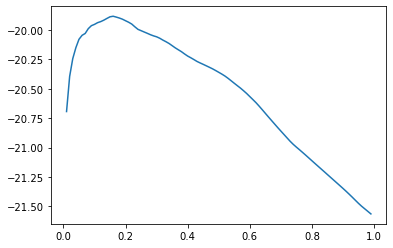

In [12]:
alpha = []
error = []

for i in range(1,100):
    alpha.append(i/100)
    lml = Lasso(alpha=(i/100))
    error.append(np.mean(cross_val_score(lml, X_train, y_train, scoring='neg_mean_absolute_error', cv= 3)))

plt.plot(alpha,error)


# in below graph we get peak at approx 0.2 whih is alpha

In [13]:
err = tuple(zip(alpha,error))
df_err = pd.DataFrame(err, columns=['alpha','error'])
df_err[df_err.error == max(df_err.error)]


# we are getting alpha as 0.16 which pretty close to 0.2  

,alpha,error
15,0.16,-19.881695


#### Random forest 

In [14]:
from sklearn.ensemble import RandomForestRegressor

rf = RandomForestRegressor()

np.mean(cross_val_score(rf, X_train, y_train, scoring='neg_mean_absolute_error', cv= 3))

-15.528013083457246

#### Tune models - GridsearchCV

In [15]:
from sklearn.model_selection import GridSearchCV
parameters = {'n_estimators':range(10,300,10), 'criterion':('mse','mae'), 'max_features':('auto','sqrt','log2')}

In [16]:
gs = GridSearchCV(rf,parameters,scoring='neg_mean_absolute_error',cv=3)

In [17]:
gs.fit(X_train,y_train)

GridSearchCV(cv=3, estimator=RandomForestRegressor(),
             param_grid={'criterion': ('mse', 'mae'),
                         'max_features': ('auto', 'sqrt', 'log2'),
                         'n_estimators': range(10, 300, 10)},
             scoring='neg_mean_absolute_error')

In [18]:
gs.best_score_

-15.354393890561404

In [19]:
gs.best_estimator_

RandomForestRegressor(n_estimators=140)

#### Test ensembles

In [20]:
tpred_lm = lm.predict(X_test)

In [21]:
lm_l = Lasso(alpha=0.16)
lm_l.fit(X_train, y_train)

Lasso(alpha=0.16)

In [22]:
tpred_lml = lm_l.predict(X_test)

In [23]:
tpred_rf = gs.best_estimator_.predict(X_test)

In [24]:
from sklearn.metrics import mean_absolute_error

In [25]:
mean_absolute_error(y_test,tpred_lm)

19.65453357854756

In [26]:
mean_absolute_error(y_test,tpred_lml)

20.483374364045247

In [27]:
mean_absolute_error(y_test,tpred_rf)

11.37408916586769

In [28]:
mean_absolute_error(y_test,(tpred_lm+tpred_rf)/2)

14.852226194487315

In [29]:
import pickle
pickl = {'model': gs.best_estimator_}
pickle.dump( pickl, open( 'model_file' + ".p", "wb" ) )

In [30]:
file_name = "model_file.p"
with open(file_name, 'rb') as pickled:
    data = pickle.load(pickled)
    model = data['model']

In [31]:
model.predict(np.array(list(X_test.iloc[1,:])).reshape(1,-1))[0]

53.43571428571428

In [32]:
list(X_test.iloc[1,:])

[3.6,
 0.0,
 0.0,
 0.0,
 1.0,
 34.0,
 4608.0,
 0.0,
 1.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 1.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 1.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 1.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 1.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 1.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 1.0,
 0.0]